In [1]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

403 600


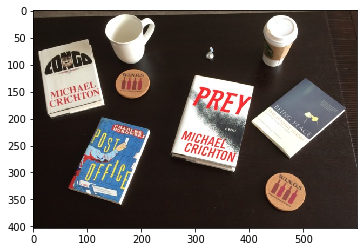

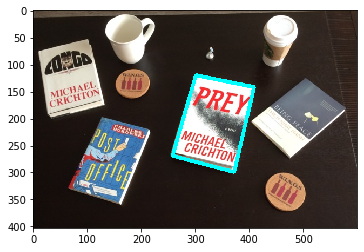

[[  0.   0.]
 [600.   0.]
 [  0. 403.]
 [600. 403.]]


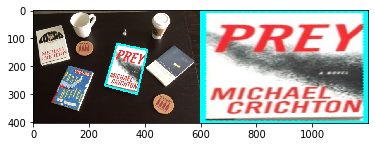

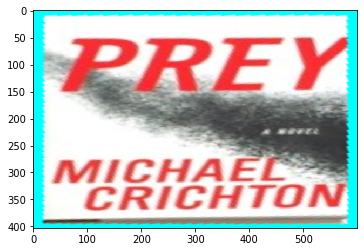

In [72]:
#이미지 호출 
img = cv2.imread("./data/book.jpg")
height, width = img.shape[:2]
print(height, width)
#imshow('',img)

#그늘은 노이즈라 생각하면 된다.먼저 그레이로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#블러로 1차 잡음 제거
blur = cv2.GaussianBlur(gray, (3,3), 0 )


#잡음제거 ,어느 값 이하는 다 0으로 떨어지게 하고ㅇㅋ?
_,binary = cv2.threshold(blur, 76, 255 , cv2.THRESH_BINARY )
#binary = 255 -binary
#imshow('',binary)


#팽창후 침식, 비어있는 구멍 채운 후 원래사이즈로 복귀 , 구멍메꾸기
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), 
                          iterations = 4 )


#imshow('',closed)


imshow('',np.hstack([img]))




#변조방지
copy_img = closed.copy()

#바운더리(꼭지점?) 찾기
#findContours 함수는 원본이미지를 변경시키기 때문에 copy를 미리 사용한다.
contours, _ = cv2.findContours(copy_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# #print(contours)
max_area = 0
for con in contours:
    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con, 0.1*peri, True)
    area = cv2.contourArea(con) # 컨투어의 영역(면적)을 계산, 실수값으로 나옴
    #print(f"shape={len(con)}  length={peri} approx={len(approx)} area={area}")
    if len(approx) == 4 and max_area < area:
        max_area = area
        boundary = approx
        
cv2.drawContours(img, [boundary], -1, (255, 255, 0), 5) #두번째 배열처럼 넣어줘야함
imshow('',np.hstack([img]))


boundary_list = []
for i in range(4):
    boundary_list.append(list(boundary[i][0]))

#꼭지점
#print(boundary_list)
#만들기
pts1 = np.float32([boundary_list[0],
                  boundary_list[3],
                  boundary_list[1],
                  boundary_list[2]
                  ])
#print(pts1)# 꼭지점 4개

#pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
print(pts2) # 0,0 -> 0,x -> y,0 -> x,y 순

M = cv2.getPerspectiveTransform(pts1,pts2) # 이미지, 회전각도, 확대배율
#print(M)

#rotate_img = cv2.warpPerspective(img, M , (width,height) ) #
rotate_img = cv2.warpPerspective(img, M , (int(width),int(height)) ) #
                           
#print(rotate_img.shape) 
imshow('',np.hstack([img, rotate_img  ]))

imshow('',np.hstack([rotate_img]))

480 640


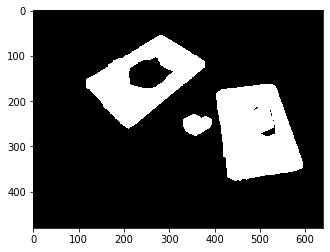

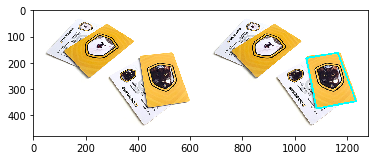

In [160]:
#이미지 호출 
img = cv2.imread("./data/animal_card.jpg")
base_copy_img = img.copy()
height, width = img.shape[:2]
print(height, width)
#imshow('',img)

#흑백처리
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#블러처리
blur = cv2.GaussianBlur(gray, (3,3), 100)

#잡음제거 ,어느 값 이하는 다 0으로 떨어지게 하고ㅇㅋ?
_,binary = cv2.threshold(blur, 220, 255 , cv2.THRESH_BINARY)
binary = 255 -binary
#imshow('',binary)


#팽창후 침식, 비어있는 구멍 채운 후 원래사이즈로 복귀 , 구멍메꾸기
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), 
                          iterations = 6 )

imshow('',opened)


#변조방지
copy_img = opened.copy()

#바운더리(꼭지점?) 찾기
#findContours 함수는 원본이미지를 변경시키기 때문에 copy를 미리 사용한다.
contours, _ = cv2.findContours(copy_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# #print(contours)
max_area = 0
for con in contours:
    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con, 0.1*peri, True)
    area = cv2.contourArea(con) # 컨투어의 영역(면적)을 계산, 실수값으로 나옴
    #print(f"shape={len(con)}  length={peri} approx={len(approx)} area={area}")
    cv2.drawContours(base_copy_img, [boundary], -1, (255, 255, 0), 5) #두번째 배열처럼 넣어줘야함
#     if len(approx) == 4 and max_area < area:
#         max_area = area
#         boundary = approx
        
#cv2.drawContours(img, [boundary], -1, (255, 255, 0), 5) #두번째 배열처럼 넣어줘야함
imshow('',np.hstack([img, base_copy_img]))


boundary_list = []
for i in range(4):
    boundary_list.append(list(boundary[i][0]))

    
    

[[  0.   0.]
 [640.   0.]
 [  0. 480.]
 [640. 480.]]


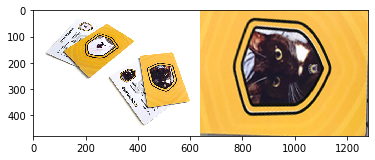

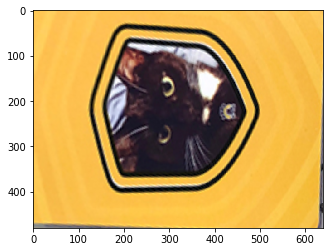

In [161]:
#꼭지점
#print(boundary_list)
#만들기
pts1 = np.float32([boundary_list[0],
                  boundary_list[3],
                  boundary_list[1],
                  boundary_list[2]
                  ])
#print(pts1)# 꼭지점 4개

#pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
print(pts2) # 0,0 -> 0,x -> y,0 -> x,y 순

M = cv2.getPerspectiveTransform(pts1,pts2) # 이미지, 회전각도, 확대배율
#print(M)

#rotate_img = cv2.warpPerspective(img, M , (width,height) ) #
rotate_img = cv2.warpPerspective(img, M , (int(width),int(height)) ) #
                           
#print(rotate_img.shape) 
imshow('',np.hstack([img, rotate_img  ]))

imshow('',np.hstack([rotate_img]))